In [1]:
# !pip install --upgrade ipykernel

In [40]:
import pandas as pd
import numpy as np
import gensim
from gensim.models import LdaMulticore
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [4]:
df = pd.read_csv('../data/ExtractedTweets.csv')
df

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...
...,...,...,...
86455,Republican,RepTomPrice,Check out my op-ed on need for End Executive O...
86456,Republican,RepTomPrice,"Yesterday, Betty &amp; I had a great time lear..."
86457,Republican,RepTomPrice,We are forever grateful for the service and sa...
86458,Republican,RepTomPrice,Happy first day of school @CobbSchools! #CobbB...


### Creating 'tokens' columns from the tweets

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

def custom_tokenizer(string):
    tokenizer= CountVectorizer(stop_words='english').build_tokenizer()
    tokens = tokenizer(string.lower())
#     lemmitized_tokens = [...]
#     stemmed_tokens = [...]
    return tokens

In [6]:
df['tokens'] = df['Tweet'].map(custom_tokenizer)

In [7]:
# https://towardsdatascience.com/try-texthero-the-absolute-simplest-way-to-clean-and-analyze-text-in-pandas-6db86ed14272
# !pip install texthero
import texthero as hero

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:16

In [8]:
df['tokens'] = hero.clean(df['tokens'])

In [9]:
def remove_words(lst):
    lst = lst.replace('https', '')
    lst = lst.replace('co', '')
    lst = lst.replace('rt', '')
    lst = lst.replace('amp', '')
    return lst

In [10]:
df['tokens'] = df['tokens'].map(remove_words)

### Visualing keywords (bar chart and word cloud)

In [14]:
tw = hero.visualization.top_words(df['tokens']).head(20)

import plotly.express as px
fig = px.bar(tw)
fig.show()
tw.head()

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/plotly/io/_renderers.py:396: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



today    8732
great    4552
thank    3895
house    3877
tax      3590
Name: tokens, dtype: int64

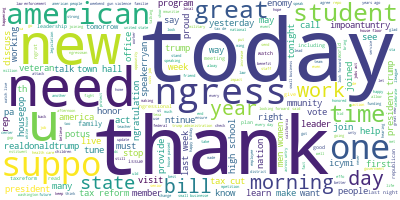

In [15]:
# https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['tokens'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [19]:
# This is for if you want to try the gensim LDA models after trying sklearn version
# import gensim.corpora as corpora

# data_words = list(df['tokens'])

# # Create Dictionary
# id2word = corpora.Dictionary(data_words)

# # Create Corpus
# texts = data_words

# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]

# # View
# print(corpus[:1][0][:30])

# # number of topics
# num_topics = 10

# # Build LDA model
# lda_model = gensim.models.LdaMulticore(corpus=corpus,
#                                        id2word=id2word,
#                                        num_topics=num_topics)

In [25]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)

dtm_tf = tf_vectorizer.fit_transform(df['tokens'])
print(dtm_tf.shape)

(86460, 8225)


In [26]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(df['tokens'])
print(dtm_tfidf.shape)

(86460, 8225)


In [28]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=20, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=20, random_state=0)

# Visualizing the models with pyLDAvis


In [29]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.163584 -0.203219       1        1  6.943546
1     -0.219527 -0.144760       2        1  6.712643
6      0.210633 -0.012883       3        1  6.362266
5      0.141513 -0.059535       4        1  6.309909
18    -0.102377  0.175947       5        1  6.164564
9      0.089146  0.003872       6        1  6.144242
0     -0.131248  0.174603       7        1  5.192597
12    -0.147370 -0.145052       8        1  5.088319
11     0.220572 -0.033356       9        1  5.047747
10    -0.171753 -0.027169      10        1  4.950057
19    -0.128020 -0.005811      11        1  4.857165
7      0.190312 -0.015861      12        1  4.638680
17    -0.064760  0.250218      13        1  4.344786
13     0.148855 -0.029055      14        1  4.318757
4      0.009631 -0.090693      15        1  4.202850
14     0.051029 -0.092436      16        1  3.946232
8      0.023918  0.037424      17        1  3.858110
16     0.020422  0.097295      18        1  3.847043
2      0.092577  0.012034      19        1  3.632222
15    -0.069969  0.108438      20        1  3.438267, topic_info=               Term         Freq        Total Category  logprob  loglift
3044          house  3803.000000  3803.000000  Default  30.0000  30.0000
7102       students  2093.000000  2093.000000  Default  29.0000  29.0000
74              act  2775.000000  2775.000000  Default  28.0000  28.0000
7274            tax  3475.000000  3475.000000  Default  27.0000  27.0000
7606          trump  3035.000000  3035.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
74              act   152.517900  2775.219686  Topic20  -5.0748   0.4690
7465          today   176.603334  8597.340086  Topic20  -4.9282  -0.5151
3694     leadership   115.121693   737.002724  Topic20  -5.3561   1.5136
5486          proud   119.347144  2194.998716  Topic20  -5.3201   0.4583
4581  ngratulations   106.734148  1130.523623  Topic20  -5.4318   1.0101

[1336 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
10        1  0.967447  abetterdeal
10        2  0.025459  abetterdeal
35        1  0.992246          aca
38        3  0.057731      academy
38        9  0.715862      academy
...     ...       ...          ...
8213      5  0.055119          yrs
8213      8  0.937018          yrs
8219     13  0.979560        zinke
8223      5  0.218792   zuckerberg
8223      7  0.780691   zuckerberg

[3977 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 6, 19, 10, 1, 13, 12, 11, 20, 8, 18, 14, 5, 15, 9, 17, 3, 16])

In [30]:
pyLDAvis.sklearn.prepare(lda_tfidf, dtm_tfidf, tfidf_vectorizer)


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3     -0.134074 -0.126117       1        1  6.478950
9     -0.071191 -0.020608       2        1  6.326502
6      0.180554 -0.022306       3        1  6.052775
12    -0.133518 -0.140878       4        1  5.719000
11     0.187765  0.019420       5        1  5.709358
0     -0.125539  0.138695       6        1  5.553331
10    -0.168761  0.059799       7        1  5.483230
1     -0.159539 -0.040391       8        1  5.196072
18    -0.077328  0.089152       9        1  4.938933
5      0.063200 -0.016549      10        1  4.877239
15    -0.083223  0.161054      11        1  4.816342
4      0.027163 -0.036957      12        1  4.749724
7      0.125220  0.072839      13        1  4.737991
8      0.147471  0.055893      14        1  4.515466
13     0.155539 -0.048360      15        1  4.511720
19    -0.039277 -0.014916      16        1  4.343113
2      0.127094  0.046558      17        1  4.330508
14     0.041301 -0.175436      18        1  4.312038
16     0.005272 -0.034851      19        1  3.710247
17    -0.068129  0.033960      20        1  3.637460, topic_info=        Term        Freq        Total Category  logprob  loglift
2822   happy  587.000000   587.000000  Default  30.0000  30.0000
7274     tax  712.000000   712.000000  Default  29.0000  29.0000
6806   small  282.000000   282.000000  Default  28.0000  28.0000
7508    town  233.000000   233.000000  Default  27.0000  27.0000
6488  school  405.000000   405.000000  Default  26.0000  26.0000
...      ...         ...          ...      ...      ...      ...
7465   today   32.445460  1455.332524  Topic20  -5.5765  -0.4895
3044   house   26.959190   774.922721  Topic20  -5.7617  -0.0446
7173   suppo   26.113190   517.900748  Topic20  -5.7936   0.3265
7374   thank   25.786441   909.319286  Topic20  -5.8062  -0.2490
7606   trump   25.185499   630.141104  Topic20  -5.8298   0.0942

[1432 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
10        1  0.971755        abetterdeal
22       14  0.936705            abraham
24       18  0.960831           absolute
32        7  0.947384             abuses
35        1  0.780018                aca
...     ...       ...                ...
8196     11  0.710485                yes
8196     19  0.015117                yes
8223      6  0.028587         zuckerberg
8223      9  0.957652         zuckerberg
8224      9  0.952528  zuckerberghearing

[6209 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 10, 7, 13, 12, 1, 11, 2, 19, 6, 16, 5, 8, 9, 14, 20, 3, 15, 17, 18])

## Using different MDS functions


#### With sklearn installed, other MDS functions, such as MMDS and TSNE can be used for plotting if the default PCoA is not satisfactory.



In [31]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmds')


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
3      0.222160 -0.142032       1        1  6.943546
1      0.283360 -0.269475       2        1  6.712643
6     -0.266775  0.142765       3        1  6.362266
5     -0.009081  0.085947       4        1  6.309909
18     0.390474 -0.099034       5        1  6.164564
9     -0.030374 -0.131965       6        1  6.144242
0      0.179170  0.348716       7        1  5.192597
12     0.027356 -0.383726       8        1  5.088319
11    -0.409184  0.141868       9        1  5.047747
10     0.270361  0.255080      10        1  4.950057
19     0.264399  0.114472      11        1  4.857165
7     -0.179363  0.229126      12        1  4.638680
17    -0.298644 -0.301886      13        1  4.344786
13    -0.022912  0.361047      14        1  4.318757
4      0.133864 -0.329108      15        1  4.202850
14    -0.188226  0.404496      16        1  3.946232
8     -0.156594 -0.337212      17        1  3.858110
16    -0.369636 -0.125731      18        1  3.847043
2     -0.249734 -0.042385      19        1  3.632222
15     0.409379  0.079037      20        1  3.438267, topic_info=               Term         Freq        Total Category  logprob  loglift
3044          house  3803.000000  3803.000000  Default  30.0000  30.0000
7102       students  2093.000000  2093.000000  Default  29.0000  29.0000
74              act  2775.000000  2775.000000  Default  28.0000  28.0000
7274            tax  3475.000000  3475.000000  Default  27.0000  27.0000
7606          trump  3035.000000  3035.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
74              act   152.517900  2775.219686  Topic20  -5.0748   0.4690
7465          today   176.603334  8597.340086  Topic20  -4.9282  -0.5151
3694     leadership   115.121693   737.002724  Topic20  -5.3561   1.5136
5486          proud   119.347144  2194.998716  Topic20  -5.3201   0.4583
4581  ngratulations   106.734148  1130.523623  Topic20  -5.4318   1.0101

[1336 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
10        1  0.967447  abetterdeal
10        2  0.025459  abetterdeal
35        1  0.992246          aca
38        3  0.057731      academy
38        9  0.715862      academy
...     ...       ...          ...
8213      5  0.055119          yrs
8213      8  0.937018          yrs
8219     13  0.979560        zinke
8223      5  0.218792   zuckerberg
8223      7  0.780691   zuckerberg

[3977 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 6, 19, 10, 1, 13, 12, 11, 20, 8, 18, 14, 5, 15, 9, 17, 3, 16])

In [32]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')


/Users/robertherndon/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:691: FutureWarning:

'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.



PreparedData(topic_coordinates=                x           y  topics  cluster      Freq
topic                                                   
3      -10.878068   10.538728       1        1  6.943546
1      -60.884026  -75.591820       2        1  6.712643
6       -2.336119  -53.289074       3        1  6.362266
5      -61.385319  -12.914634       4        1  6.309909
18     -28.737743  126.296997       5        1  6.164564
9        1.066606 -123.552811       6        1  6.144242
0       45.140720   -7.947869       7        1  5.192597
12    -140.795975  -98.530548       8        1  5.088319
11      61.531681  -83.240562       9        1  5.047747
10     -72.563057 -140.396881      10        1  4.950057
19      15.984491   63.578186      11        1  4.857165
7     -160.851624   68.945145      12        1  4.638680
17      85.961830   51.922935      13        1  4.344786
13     -99.020836  109.936348      14        1  4.318757
4     -176.764130   -8.681684      15        1  4.202850
14    -117.189880  -37.420200      16        1  3.946232
8      108.829918  -22.946203      17        1  3.858110
16      47.588097  121.934814      18        1  3.847043
2     -106.467834   30.176889      19        1  3.632222
15     -50.613804   59.328842      20        1  3.438267, topic_info=               Term         Freq        Total Category  logprob  loglift
3044          house  3803.000000  3803.000000  Default  30.0000  30.0000
7102       students  2093.000000  2093.000000  Default  29.0000  29.0000
74              act  2775.000000  2775.000000  Default  28.0000  28.0000
7274            tax  3475.000000  3475.000000  Default  27.0000  27.0000
7606          trump  3035.000000  3035.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
74              act   152.517900  2775.219686  Topic20  -5.0748   0.4690
7465          today   176.603334  8597.340086  Topic20  -4.9282  -0.5151
3694     leadership   115.121693   737.002724  Topic20  -5.3561   1.5136
5486          proud   119.347144  2194.998716  Topic20  -5.3201   0.4583
4581  ngratulations   106.734148  1130.523623  Topic20  -5.4318   1.0101

[1336 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
10        1  0.967447  abetterdeal
10        2  0.025459  abetterdeal
35        1  0.992246          aca
38        3  0.057731      academy
38        9  0.715862      academy
...     ...       ...          ...
8213      5  0.055119          yrs
8213      8  0.937018          yrs
8219     13  0.979560        zinke
8223      5  0.218792   zuckerberg
8223      7  0.780691   zuckerberg

[3977 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 7, 6, 19, 10, 1, 13, 12, 11, 20, 8, 18, 14, 5, 15, 9, 17, 3, 16])

In [36]:
lda_output = lda_tf.transform(dtm_tf)
df_lda = pd.DataFrame(np.round(lda_output, 2))
df_lda

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.85,0.00
1,0.01,0.01,0.23,0.01,0.01,0.01,0.01,0.25,0.01,0.01,0.01,0.23,0.01,0.21,0.01,0.01,0.01,0.01,0.01,0.01
2,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.59,0.11,0.01,0.01,0.10,0.01,0.01,0.12,0.01,0.01,0.01,0.01
3,0.01,0.01,0.01,0.01,0.01,0.86,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
4,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.63,0.01,0.01,0.01,0.01,0.01,0.13,0.13,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86455,0.20,0.18,0.00,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.27,0.00
86456,0.11,0.00,0.00,0.00,0.00,0.81,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86457,0.01,0.01,0.01,0.01,0.01,0.01,0.84,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
86458,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.30,0.01,0.47,0.01,0.01,0.01,0.01,0.01,0.01


In [38]:
new_df = pd.concat([df, df_lda], axis=1)

In [39]:
new_df.to_csv('../data/df_with_lda.csv')